In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from utils.paths import DATA_RAW_DIR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import ipywidgets as widgets
from IPython.display import display

In [15]:
path_partidos = str(DATA_RAW_DIR / 'partidos_cebollitas.csv')

print('Path:', path_partidos)
print('Does path exist?', Path(path_partidos).exists())

Path: /Users/jssdev/Dev/Learning/Platzi/platzi-machine-learning/data/raw/partidos_cebollitas.csv
Does path exist? True


In [16]:
df_partidos = pd.read_csv(path_partidos, sep=',', encoding='utf-8')

In [17]:
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

In [18]:
# Variables predictoras
X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

# División estándar: 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar y entrenar modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_rl.predict(X_test)

In [19]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.2f}")

MSE (Error Cuadrático Medio): 4.96
RMSE (Raíz del Error Cuadrático Medio): 2.23
MAE (Error Absoluto Medio): 1.89
R² (Coeficiente de Determinación): -0.03


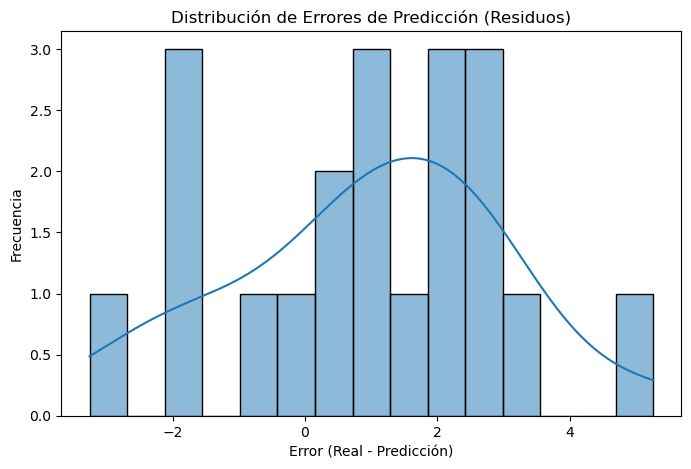

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Distribución de Errores de Predicción (Residuos)')
plt.xlabel('Error (Real - Predicción)')
plt.ylabel('Frecuencia')
plt.show()


In [21]:
import ipywidgets as widgets

def evaluar_predicciones(threshold_mae):
    calidad = "buena" if mae <= threshold_mae else "regular o mala"
    print(f"Tu modelo tiene una MAE de {mae:.2f}, considerada {calidad} (umbral definido: {threshold_mae}).")

umbral_widget = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1.0, description='Umbral MAE:')
widgets.interactive(evaluar_predicciones, threshold_mae=umbral_widget)

interactive(children=(FloatSlider(value=1.0, description='Umbral MAE:', max=5.0, min=0.1), Output()), _dom_cla…

In [22]:
if r2 < 0:
    print("❌ El modelo no explica la varianza. Peor que adivinar.")
elif r2 < 0.3:
    print("⚠️ El modelo explica muy poco. Posible underfitting.")
else:
    print("✅ El modelo tiene un poder explicativo aceptable.")

❌ El modelo no explica la varianza. Peor que adivinar.
